# Examples for pyoculus
## 1. Import pyoculus and the solvers

In [1]:
import numpy as np
from pyoculus.problems import TwoWaves
from pyoculus.problems import ToroidalBfieldSection
from pyoculus.solvers import PoincarePlot, FixedPoint, LyapunovExponent, FluxSurfaceGR

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

## 2. Set up the problem we want to compute.
This can be a SPEC equilibrium or anything. Here as an example, we use the perturbed slab model Stuart uses for his "Destruction" paper

In [3]:
Mag = TwoWaves(k=0.0018)

In [4]:
section = ToroidalBfieldSection(Mag, rtol=1e-9)

## 3. Poincare Plot

In [5]:
pplot = PoincarePlot.with_linspace(section, [0.58, 0], [0.66, 0], 50)

In [6]:
pplot.compute(npts = 500, compute_iota=True)

array([[[0.58      , 0.        ],
        [0.58209783, 3.64978497],
        [0.57800252, 1.01809958],
        ...,
        [0.59036354, 3.29490727],
        [0.57940159, 0.69880864],
        [0.55973835, 4.272477  ]],

       [[0.58163265, 0.        ],
        [0.58356942, 3.65960559],
        [0.57983741, 1.03776976],
        ...,
        [0.57157132, 2.34333598],
        [0.58267959, 5.96253907],
        [0.59390554, 3.38320079]],

       [[0.58326531, 0.        ],
        [0.58503907, 3.66942341],
        [0.581668  , 1.05740773],
        ...,
        [0.58582019, 5.35415289],
        [0.59233933, 2.7815531 ],
        [0.58391239, 0.19810017]],

       ...,

       [[0.65673469, 0.        ],
        [0.64997156, 4.10963544],
        [0.65181357, 1.90452938],
        ...,
        [0.68720019, 0.07915559],
        [0.67411195, 4.36046196],
        [0.67148001, 2.29444718]],

       [[0.65836735, 0.        ],
        [0.65141004, 4.11941565],
        [0.65308578, 1.92278823],
        .

(0.58, 0.66)

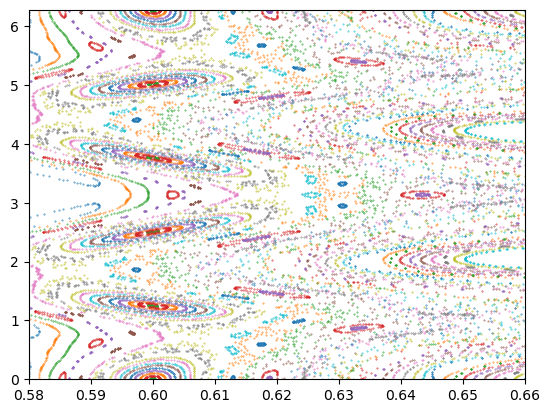

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for hit in pplot._hits:
    ax.scatter(hit[:, 0], hit[:, 1], marker='.', s=0.5)
ax.set_ylim(0, 2*np.pi)
ax.set_xlim(0.58, 0.66)

In [8]:
pplot.compute_iota()

(array([[0.58      , 0.        ],
        [0.58163265, 0.        ],
        [0.58326531, 0.        ],
        [0.58489796, 0.        ],
        [0.58653061, 0.        ],
        [0.58816327, 0.        ],
        [0.58979592, 0.        ],
        [0.59142857, 0.        ],
        [0.59306122, 0.        ],
        [0.59469388, 0.        ],
        [0.59632653, 0.        ],
        [0.59795918, 0.        ],
        [0.59959184, 0.        ],
        [0.60122449, 0.        ],
        [0.60285714, 0.        ],
        [0.6044898 , 0.        ],
        [0.60612245, 0.        ],
        [0.6077551 , 0.        ],
        [0.60938776, 0.        ],
        [0.61102041, 0.        ],
        [0.61265306, 0.        ],
        [0.61428571, 0.        ],
        [0.61591837, 0.        ],
        [0.61755102, 0.        ],
        [0.61918367, 0.        ],
        [0.62081633, 0.        ],
        [0.62244898, 0.        ],
        [0.62408163, 0.        ],
        [0.62571429, 0.        ],
        [0.627

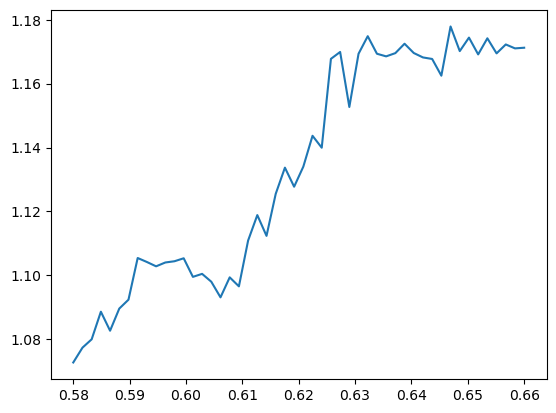

In [9]:
plt.plot(np.linalg.norm(pplot.xs, axis=1), pplot.iota)

## 4. Finding fixed points and plot them

In [10]:
fp58 = FixedPoint(section)
fp35 = FixedPoint(section)

In [11]:
fp58.find_with_iota(5, 8, guess=[0.618, 0], method='1D')

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [0.618 0.   ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x_winding : [ 0.61889847 31.31974887]
INFO:pyoculus.solvers.fixed_point:Newton 0 - step: [0.00082507 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x_new: [0.61882507 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x : [0.61882507 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x_winding : [ 0.61880494 31.41866969]
INFO:pyoculus.solvers.fixed_point:Newton 1 - step: [-2.22518148e-05  0.00000000e+00]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x_new: [0.61880281 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 2 - x : [0.61880281 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 2 - x_winding : [ 0.6188028 31.4159286]
INFO:pyoculus.solvers.fixed_point:Newton 2 - step: [-1.67478683e-08  0.00000000e+00]
INFO:pyoculus.solvers.fixed_point:Newton 2 - x_new: [0.6188028 0.       ]
INFO:pyoculus.solvers.fixed_point:Newton 3 - x : [0.6188028 0.       ]
IN

In [12]:
fp35.find_with_iota(3, 5, guess=[0.6, 0.], method='1D')

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [0.6 0. ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x_winding : [ 0.6        18.84955592]
INFO:pyoculus.solvers.fixed_point:Found fixed point at [0.6 0. ]. Computing additionnal data...


In [13]:
fp35.plot(ax=ax)
fp58.plot(ax=ax)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

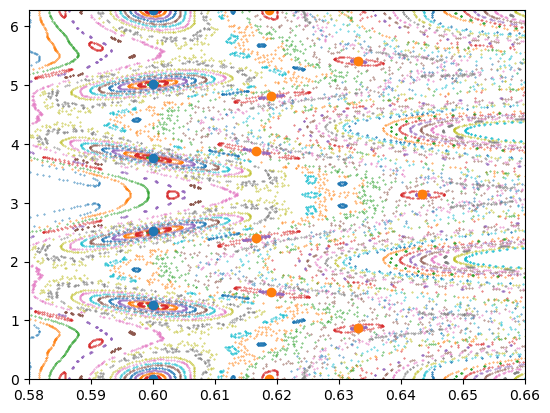

In [14]:
fig

## 5. Greene's Residue and finding flux surfaces

In [15]:
iota = 1/((np.sqrt(5) + 1) / 2)

In [19]:
flux_surface = FluxSurfaceGR(section)
flux_surface.GreeneMethod(iota, fp35, fp58, nexpand=9, method="1D", tol=1e-9, nrestart=4)

INFO:pyoculus.solvers.flux_surface_gr:n1 = 0, m1 = 1, n2 = 1, m2 = 1
INFO:pyoculus.solvers.flux_surface_gr:n1 = 1, m1 = 1, n2 = 1, m2 = 2
INFO:pyoculus.solvers.flux_surface_gr:n1 = 1, m1 = 2, n2 = 2, m2 = 3
INFO:pyoculus.solvers.flux_surface_gr:n1 = 2, m1 = 3, n2 = 3, m2 = 5
INFO:pyoculus.solvers.flux_surface_gr:n1 = 3, m1 = 5, n2 = 5, m2 = 8
INFO:pyoculus.solvers.flux_surface_gr:n1 = 5, m1 = 8, n2 = 8, m2 = 13
INFO:pyoculus.solvers.flux_surface_gr:n1 = 8, m1 = 13, n2 = 13, m2 = 21
INFO:pyoculus.solvers.flux_surface_gr:Searching for the fixedpoint with n = 8, m = 13 at x_guess = [0.61023492 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [0.61023492 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x_winding : [ 0.61150321 49.66290252]
INFO:pyoculus.solvers.fixed_point:Newton 0 - step: [0.00318584 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - x_new: [0.61342075 0.        ]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x : [0.61342075 0.        ]
INFO:pyocu

In [20]:
flux_surface.plot(ax=ax)

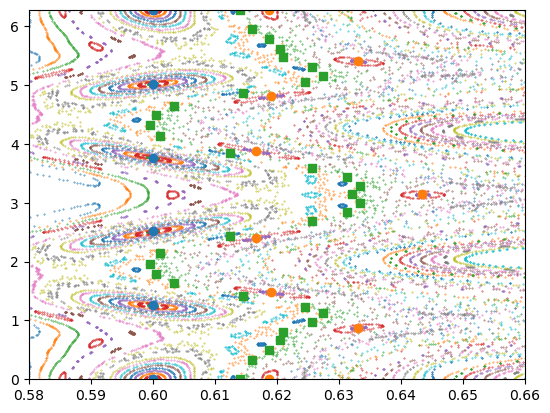

In [21]:
fig

In [22]:
flux_surface.plot_residue()

AttributeError: 'FixedPoint' object has no attribute 'GreenesResidue'

## 6. Compute the Lyapunov Exponent

In [ ]:
# set up the integrator
le = LyapunovExponent(section, nsave=100, every=40)

In [ ]:
le.compute(fp58.coords[0])

In [ ]:
fig, ax = le.plot()

In [ ]:
le.compute([0.63, 0])

In [ ]:
le.plot()

## 7. QFM

In [ ]:
qfm = pyoculus.solvers.QFM(ps, {"pqNtor":8, "pqMpol":24, "nfft_multiplier":2})

plist = np.array([5,13, 8,11,3])
qlist = np.array([8,21,13,18,5])
sguess= np.ones(qlist.size) * 0.6
surfaces = qfm.construct_qfms(plist,qlist, sguesslist=sguess, bounding_surfaces=None)

In [ ]:
pplot.plot(ylim=[0.58,0.66],s=0.5)
surfaces.plot(zeta=0,linewidth=1)
fp35.plot()
fp58.plot()